In [1]:
import pandas as pd
import numpy as np
import spacy
from spacy import displacy
import networkx as nx

import matplotlib.pyplot as plt

In [2]:
!python3 -m spacy download en_core_web_sm

  Using cached https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.3.0/en_core_web_sm-3.3.0-py3-none-any.whl (12.8 MB)
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [2]:
# Load spacy English languague model
NER = spacy.load("en_core_web_sm")

## Load books

In [3]:
import os
 
# Get all book files in the data directory
all_books = [b for b in os.scandir('data') if '.txt' in b.name]

In [4]:
all_books

[<DirEntry '1 The Last Wish.txt'>,
 <DirEntry '2 The Sword of Destiny.txt'>,
 <DirEntry '3 Blood of Elves.txt'>,
 <DirEntry '4 Times of Contempt.txt'>,
 <DirEntry '5 Baptism of Fire.txt'>,
 <DirEntry '6 The Tower of the Swallow.txt'>,
 <DirEntry '7 The Lady of the Lake.txt'>,
 <DirEntry '8 something ends something begins.txt'>]

In [5]:
book = all_books[1]
book_text = open(book).read()
book_doc = NER(book_text)

In [6]:
# Visualize identified entities
displacy.render(book_doc[0:2000], style="ent", jupyter=True)

## Load character names

In [7]:
# Read characters
character_df = pd.read_csv("characters.csv")

In [8]:
# Remove brackets and text within brackets
import re 
character_df['character'] = character_df['character'].apply(lambda x: re.sub("[\(].*?[\)]", "", x)) 
character_df['character_firstname'] = character_df['character'].apply(lambda x: x.split(' ', 1)[0])

In [9]:
pd.set_option('display.max_rows', None)
character_df

book  \
0                   Category:Baptism of Fire characters   
1                   Category:Baptism of Fire characters   
2                   Category:Baptism of Fire characters   
3                   Category:Baptism of Fire characters   
4                   Category:Baptism of Fire characters   
5                   Category:Baptism of Fire characters   
6                   Category:Baptism of Fire characters   
7                   Category:Baptism of Fire characters   
8                   Category:Baptism of Fire characters   
9                   Category:Baptism of Fire characters   
10                  Category:Baptism of Fire characters   
11                  Category:Baptism of Fire characters   
12                  Category:Baptism of Fire characters   
13                  Category:Baptism of Fire characters   
14                  Category:Baptism of Fire characters   
15                  Category:Baptism of Fire characters   
16                  Category:Baptism of Fire characters   
17                  Category:Baptism of Fire characters   
18                  Category:Baptism of Fire characters   
19                  Category:Baptism of Fire characters   
20                  Category:Baptism of Fire characters   
21                  Category:Baptism of Fire characters   
22                  Category:Baptism of Fire characters   
23                  Category:Baptism of Fire characters   
24                  Category:Baptism of Fire characters   
25                  Category:Baptism of Fire characters   
26                  Category:Baptism of Fire characters   
27                  Category:Baptism of Fire characters   
28                  Category:Baptism of Fire characters   
29                  Category:Baptism of Fire characters   
30                  Category:Baptism of Fire characters   
31                  Category:Baptism of Fire characters   
32                  Category:Baptism of Fire characters   
33                  Category:Baptism of Fire characters   
34                  Category:Baptism of Fire characters   
35                  Category:Baptism of Fire characters   
36                  Category:Baptism of Fire characters   
37                  Category:Baptism of Fire characters   
38                  Category:Baptism of Fire characters   
39                  Category:Baptism of Fire characters   
40                  Category:Baptism of Fire characters   
41                  Category:Baptism of Fire characters   
42                  Category:Baptism of Fire characters   
43                  Category:Baptism of Fire characters   
44                  Category:Baptism of Fire characters   
45                  Category:Baptism of Fire characters   
46                  Category:Baptism of Fire characters   
47                  Category:Baptism of Fire characters   
48                  Category:Baptism of Fire characters   
49                  Category:Baptism of Fire characters   
50                  Category:Baptism of Fire characters   
51                  Category:Baptism of Fire characters   
52                  Category:Baptism of Fire characters   
53                  Category:Baptism of Fire characters   
54                  Category:Baptism of Fire characters   
55                  Category:Baptism of Fire characters   
56                  Category:Baptism of Fire characters   
57                  Category:Baptism of Fire characters   
58                  Category:Baptism of Fire characters   
59                  Category:Baptism of Fire characters   
60                  Category:Baptism of Fire characters   
61                  Category:Baptism of Fire characters   
62                  Category:Baptism of Fire characters   
63                  Category:Baptism of Fire characters   
64                  Category:Baptism of Fire characters   
65                  Category:Baptism of Fire characters   
66                  Category:Baptism of Fire characters   
67                  Category:Baptism of

## Get named entity list per sentence

In [10]:
sent_entity_df = []

# Loop through sentences, store named entity list for each sentence
for sent in book_doc.sents:
    entity_list = [ent.text for ent in sent.ents]
    sent_entity_df.append({"sentence": sent, "entities": entity_list})
    
sent_entity_df = pd.DataFrame(sent_entity_df)

In [12]:
sent_entity_df

sentence  \
0      (ï»¿The, Limits, of, the, Possible, \n, I, \n,...   
1      (", It, 's, been, an, hour, and, a, quarter, s...   
2      (He, 's, done, for, ., ", \n, The, townsfolk, ...   
3      (A, fat, man, dressed, in, a, yellow, smock, \...   
4      (\n, ", We, have, to, wait, a, bit, longer, ,,...   
5      (\n, ", Why, wait, ?, ", snorted, pimply, ,, "...   
6      (Anyone, goes, down, there, ,, that, 's, the, ...   
7      (Have, you, forgotten, how, many, \n, have, di...   
8      (What, are, we, waiting, for, ?, ", \n, ", Thi...   
9              (murmured, the, fat, man, uncertainly, .)   
10     (\n, ", An, agreement, you, made, with, a, liv...   
11     (", He, is, now, dead, ,, as, surely, as, the,...   
12     (It, was, plain, from, the, beginning, that, h...   
13     (He, did, n't, even, take, a, mirror, with, hi...   
14     (", \n, ", At, least, we, 've, saved, some, co...   
15                   (You, might, as, well, go, home, .)   
16     (As, far, as, the, sorcerer, 's, horse, and, b...   
17     (well, it, \n, would, be, a, shame, if, they, ...   
18     (", \n, ", Yes, ,, ", said, the, butcher, ,, "...   
19                           (Let, 's, take, a, look, .)   
20     (", \n, ", What, are, you, doing, ?, ", \n, ",...   
21     (Do, n't, get, in, the, way, unless, you, want...   
22     (\n, ", A, fine, old, mare, ,, ", repeated, th...   
23     (\n, ", Leave, the, horse, alone, ,, my, darli...   
24     (", \n, The, butcher, slowly, turned, around, ...   
25     (\n, The, stranger, had, thick, curly, brown, ...   
26                             (He, had, no, weapons, .)   
27     (\n, 3, \n, ", Step, away, from, the, horse, ,...   
28                          (", What, have, we, here, ?)   
29     (A, horse, and, saddlebags, belonging, to, ano...   
30     (Is, that, honourable, ?, ", \n, Pimply, slowl...   
31     (The, butcher, gave, a, nod, and, signalled, t...   
32     (Both, carried, heavy, clubs, ,, like, those, ...   
33     (\n, ", Who, are, you, ?, ", demanded, the, pi...   
34                (", \n, ", You, carry, no, weapons, .)   
35     (", \n, ", That, 's, true, ,, ", the, stranger...   
36     (", \n, ", That, 's, no, good, ,, ", pimply, d...   
37     (The, other, two, men, approached, ,, brandish...   
38     (\n, ", I, do, n't, carry, weapons, ,, ", resp...   
39     (The, crowd, quickly, parted, ,, retreated, th...   
40     (\n, The, girls, smiled, ,, flashing, their, t...   
41     (They, had, blue, stripes, tattooed, from, the...   
42     (Lynx, pelt, clad, their, strong, muscles, fro...   
43     (From, behind, the, mail, -, clad, shoulder, o...   
44     (\n, Pimply, got, down, on, one, knee, and, sl...   
45     (\n, From, the, hole, in, ruins, came, a, rumb...   
46     (Following, the, hands, ,, a, white, head, app...   
47                   (A, murmur, escaped, the, crowd, .)   
48     (\n, The, alabaster, -, haired, man, straighte...   
49     (Holding, the, beast, by, its, long, lizard, -...   
50     (The, burgrave, jumped, backwards, and, trippe...   
51     (Its, slashed, throat, ,, once, carmine, ,, wa...   
52                  (Its, sunken, eyes, were, glassy, .)   
53     (\n, ", Here, 's, the, basilisk, ,, ", said, t...   
54     (I, will, check, them, ,, I, 'm, warning, you, .)   
55     (", \n, 4, \n, With, shaking, hands, ,, the, b...   
56     (The, white, -, haired, man, looked, around, a...   
57     (He, also, noticed, the, man, in, the, brown, ...   
58     (\n, ", It, 's, always, the, same, ,, ", he, s...   
59     (You, people, never, change, ,, damn, you, to,...   
60     (The, men, armed, with, the, clubs, had, long,...   
61     (", Your, things, have, not, been, disturbed, ...   
62     (At, the, sight, of, his, smile, ,, which, blo...   
63     (", And, that, is, why, ,, brother, ,, you, ha...   
64                                    (Go, in, peace, .)   
65                                 (But, go, quickly, .)   
66     (", \n, Pimply, ,, ba

In [13]:
# Function to filter out non-character entities
def filter_entity(ent_list, character_df):
    return [ent for ent in ent_list 
            if ent in list(character_df.character) 
            or ent in list(character_df.character_firstname)]

In [14]:
filter_entity(["Geralt", "Thu", "2"], character_df)

['Geralt']

In [15]:
sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

# Filter out sentences that don't have any character entities
sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
sent_entity_df_filtered.head(10)

sentence  \
89   (Is, there, anything, keeping, you, in, this, ...   
95   (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...   
98   (And, you, said, that, as, if, you, were, sayi...   
102  (", \n, Geralt, took, off, a, glove, and, shoo...   
130  (\n, ", I, forgot, ,, ", Three, Jackdaws, wink...   
141  (Geralt, loosened, his, belt, ,, removed, his,...   
146  (\n, ", Do, the, girls, speak, the, common, la...   
149  (How, 's, your, soup, ,, Geralt, ?, ", \n, ", ...   
158  (Yet, there, is, a, certain, principal, underl...   
185  (Let, 's, say, a, fierce, dragon, destroys, .....   

                       entities character_entities  
89   [Geralt of Rivia, Perfect]  [Geralt of Rivia]  
95              [Borch, Geralt]           [Geralt]  
98                     [Geralt]           [Geralt]  
102                    [Geralt]           [Geralt]  
130    [Three Jackdaws, Geralt]           [Geralt]  
141                    [Geralt]           [Geralt]  
146                    [Geralt]           [Geralt]  
149                    [Geralt]           [Geralt]  
158                    [Geralt]           [Geralt]  
185                    [Geralt]           [Geralt]

In [16]:
# Take only first name of characters
sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

C:\Users\Shree\AppData\Local\Temp\ipykernel_6544\364234938.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]


In [17]:
pd.reset_option('^display.', silent=True)
sent_entity_df_filtered

sentence  \
89     (Is, there, anything, keeping, you, in, this, ...   
95     (", \n, ", Borch, ,, ", replied, Geralt, ,, wh...   
98     (And, you, said, that, as, if, you, were, sayi...   
102    (", \n, Geralt, took, off, a, glove, and, shoo...   
130    (\n, ", I, forgot, ,, ", Three, Jackdaws, wink...   
...                                                  ...   
10819  (He, only, saw, black, -, gloved, hands, squee...   
10821                                 (Oh, ,, Geralt, !)   
10826                            (Say, it, ,, Geralt, !)   
10828  (Say, it, !, ", \n, ", Forever, ,, Ciri, ., ",...   
10835  (With, good, reason, :, \n, ", You, 're, more,...   

                         entities character_entities  
89     [Geralt of Rivia, Perfect]           [Geralt]  
95                [Borch, Geralt]           [Geralt]  
98                       [Geralt]           [Geralt]  
102                      [Geralt]           [Geralt]  
130      [Three Jackdaws, Geralt]           [Geralt]  
...                           ...                ...  
10819                      [Ciri]             [Ciri]  
10821                    [Geralt]           [Geralt]  
10826                    [Geralt]           [Geralt]  
10828              [Ciri, Geralt]     [Ciri, Geralt]  
10835                      [Ciri]             [Ciri]  

[1509 rows x 3 columns]

## Create relationships

In [18]:
window_size = 5
relationships = []

for i in range(sent_entity_df_filtered.index[-1]):
    end_i = min(i+5, sent_entity_df_filtered.index[-1])
    char_list = sum((sent_entity_df_filtered.loc[i: end_i].character_entities), [])
    
    # Remove duplicated characters that are next to each other
    char_unique = [char_list[i] for i in range(len(char_list)) 
                   if (i==0) or char_list[i] != char_list[i-1]]
    
    if len(char_unique) > 1:
        for idx, a in enumerate(char_unique[:-1]):
            b = char_unique[idx + 1]
            relationships.append({"source": a, "target": b})

In [19]:
relationship_df = pd.DataFrame(relationships)

In [20]:
pd.set_option('display.max_rows', None)
relationship_df

source             target
0              Niedamir             Geralt
1              Niedamir             Geralt
2              Niedamir             Geralt
3                Geralt           Niedamir
4                Geralt           Niedamir
5                Geralt           Niedamir
6              Niedamir             Geralt
7              Niedamir             Geralt
8                Geralt           Niedamir
9                Geralt           Niedamir
10             Niedamir             Geralt
11             Niedamir             Geralt
12             Niedamir             Geralt
13             Niedamir             Geralt
14               Geralt               Eyck
15               Geralt               Eyck
16               Geralt               Eyck
17                 Eyck             Geralt
18                 Eyck             Geralt
19                 Eyck             Geralt
20               Geralt               Eyck
21               Geralt               Eyck
22               Geralt               Eyck
23             Niedamir             Geralt
24             Niedamir             Geralt
25             Niedamir             Geralt
26             Niedamir             Geralt
27             Niedamir             Geralt
28               Geralt         Dorregaray
29               Geralt         Dorregaray
30           Dorregaray           Yennefer
31             Yennefer         Dorregaray
32             Yennefer         Dorregaray
33             Yennefer         Dorregaray
34             Yennefer         Dorregaray
35             Yennefer         Dorregaray
36           Dorregaray             Geralt
37             Yennefer         Dorregaray
38           Dorregaray             Geralt
39               Boholt           Niedamir
40               Boholt           Niedamir
41               Boholt           Niedamir
42               Boholt           Niedamir
43               Boholt           Niedamir
44               Geralt             Yarpen
45               Geralt             Yarpen
46               Geralt             Yarpen
47               Yarpen           Niedamir
48               Yarpen           Niedamir
49         Gyllenstiern             Geralt
50         Gyllenstiern             Geralt
51         Gyllenstiern             Geralt
52         Gyllenstiern             Geralt
53               Geralt           Niedamir
54         Gyllenstiern             Geralt
55               Geralt           Niedamir
56         Gyllenstiern             Geralt
57               Geralt           Niedamir
58               Geralt             Kennet
59               Geralt             Kennet
60               Kennet             Boholt
61               Kennet             Boholt
62               Kennet             Boholt
63               Kennet             Boholt
64               Boholt             Geralt
65               Geralt             Boholt
66               Boholt             Geralt
67               Geralt             Boholt
68               Boholt             Geralt
69               Boholt             Geralt
70               Boholt             Geralt
71               Boholt             Geralt
72               Geralt             Yarpen
73               Boholt             Geralt
74               Geralt             Yarpen
75               Geralt             Yarpen
76               Geralt             Yarpen
77               Geralt             Yarpen
78               Yarpen         Dorregaray
79               Yarpen         Dorregaray
80           Dorregaray           Yennefer
81               Yarpen         Dorregaray
82           Dorregaray           Yennefer
83               Yarpen         Dorregaray
84           Dorregaray           Yennefer
85           Dorregaray           Yennefer
86           Dorregaray           Yennefer
87             Yennefer           Niedamir
88             Niedamir       Gyllenstiern
89             Yennefer           Niedamir
90             Niedamir       Gyllenstiern
91         Gyllenstiern           Yennefer
92             Nie

In [21]:
# Sort the cases with a->b and b->a
relationship_df = pd.DataFrame(np.sort(relationship_df.values, axis = 1), columns = relationship_df.columns)
relationship_df

source             target
0                Geralt           Niedamir
1                Geralt           Niedamir
2                Geralt           Niedamir
3                Geralt           Niedamir
4                Geralt           Niedamir
5                Geralt           Niedamir
6                Geralt           Niedamir
7                Geralt           Niedamir
8                Geralt           Niedamir
9                Geralt           Niedamir
10               Geralt           Niedamir
11               Geralt           Niedamir
12               Geralt           Niedamir
13               Geralt           Niedamir
14                 Eyck             Geralt
15                 Eyck             Geralt
16                 Eyck             Geralt
17                 Eyck             Geralt
18                 Eyck             Geralt
19                 Eyck             Geralt
20                 Eyck             Geralt
21                 Eyck             Geralt
22                 Eyck             Geralt
23               Geralt           Niedamir
24               Geralt           Niedamir
25               Geralt           Niedamir
26               Geralt           Niedamir
27               Geralt           Niedamir
28           Dorregaray             Geralt
29           Dorregaray             Geralt
30           Dorregaray           Yennefer
31           Dorregaray           Yennefer
32           Dorregaray           Yennefer
33           Dorregaray           Yennefer
34           Dorregaray           Yennefer
35           Dorregaray           Yennefer
36           Dorregaray             Geralt
37           Dorregaray           Yennefer
38           Dorregaray             Geralt
39               Boholt           Niedamir
40               Boholt           Niedamir
41               Boholt           Niedamir
42               Boholt           Niedamir
43               Boholt           Niedamir
44               Geralt             Yarpen
45               Geralt             Yarpen
46               Geralt             Yarpen
47             Niedamir             Yarpen
48             Niedamir             Yarpen
49               Geralt       Gyllenstiern
50               Geralt       Gyllenstiern
51               Geralt       Gyllenstiern
52               Geralt       Gyllenstiern
53               Geralt           Niedamir
54               Geralt       Gyllenstiern
55               Geralt           Niedamir
56               Geralt       Gyllenstiern
57               Geralt           Niedamir
58               Geralt             Kennet
59               Geralt             Kennet
60               Boholt             Kennet
61               Boholt             Kennet
62               Boholt             Kennet
63               Boholt             Kennet
64               Boholt             Geralt
65               Boholt             Geralt
66               Boholt             Geralt
67               Boholt             Geralt
68               Boholt             Geralt
69               Boholt             Geralt
70               Boholt             Geralt
71               Boholt             Geralt
72               Geralt             Yarpen
73               Boholt             Geralt
74               Geralt             Yarpen
75               Geralt             Yarpen
76               Geralt             Yarpen
77               Geralt             Yarpen
78           Dorregaray             Yarpen
79           Dorregaray             Yarpen
80           Dorregaray           Yennefer
81           Dorregaray             Yarpen
82           Dorregaray           Yennefer
83           Dorregaray             Yarpen
84           Dorregaray           Yennefer
85           Dorregaray           Yennefer
86           Dorregaray           Yennefer
87             Niedamir           Yennefer
88         Gyllenstiern           Niedamir
89             Niedamir           Yennefer
90         Gyllenstiern           Niedamir
91         Gyllenstiern           Yennefer
92         Gyllens

In [22]:
relationship_df["value"] = 1
relationship_df = relationship_df.groupby(["source","target"], sort=False, as_index=False).sum()

In [23]:
relationship_df.head(10)

source        target  value
0      Geralt      Niedamir     55
1        Eyck        Geralt     30
2  Dorregaray        Geralt     23
3  Dorregaray      Yennefer     56
4      Boholt      Niedamir     20
5      Geralt        Yarpen     16
6    Niedamir        Yarpen     12
7      Geralt  Gyllenstiern     36
8      Geralt        Kennet      2
9      Boholt        Kennet     12

## Graph analysis and visualization

In [24]:
# Create a graph from a pandas dataframe
G = nx.from_pandas_edgelist(relationship_df, 
                            source = "source", 
                            target = "target", 
                            edge_attr = "value", 
                            create_using = nx.Graph())

#### Graph visualization - Networkx

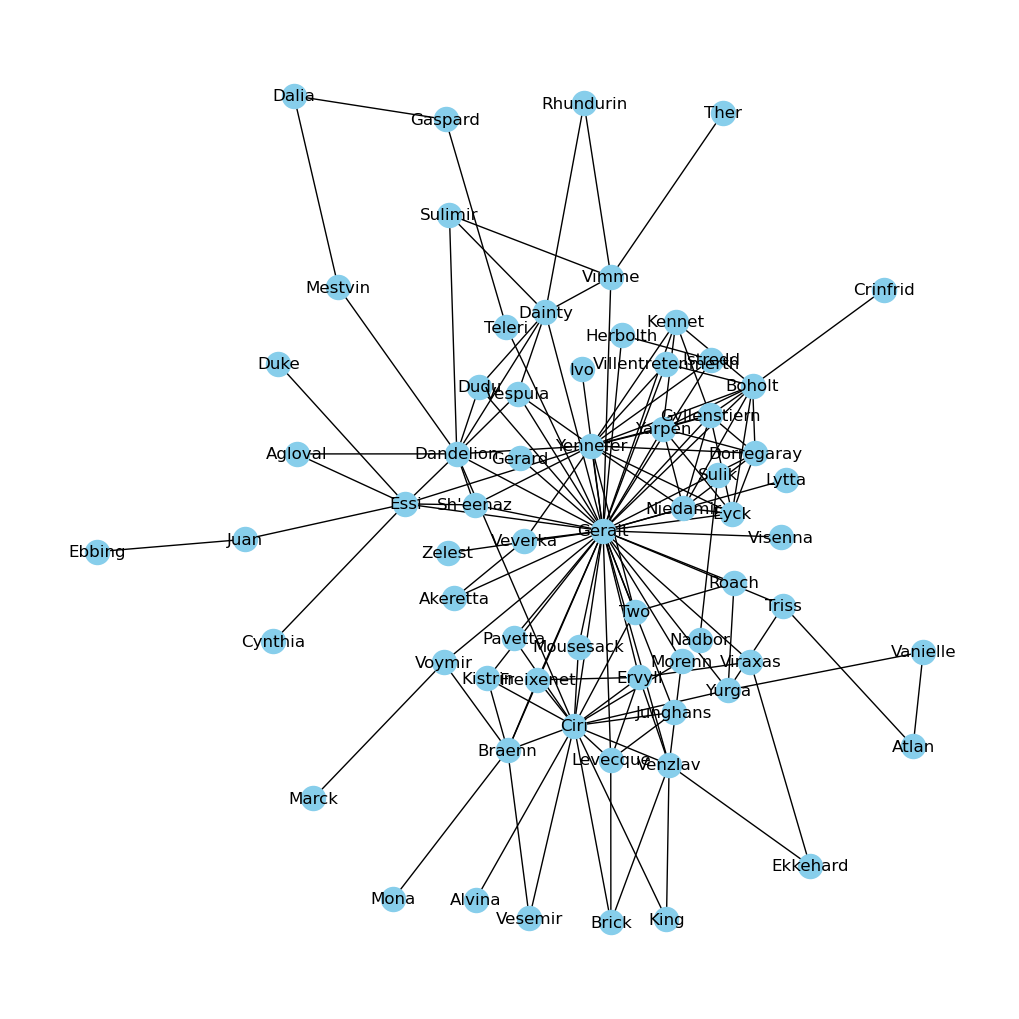

In [25]:
plt.figure(figsize=(10,10))
pos = nx.kamada_kawai_layout(G)
nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
plt.show()

#### Graph visualization - Pyvis

In [26]:
from pyvis.network import Network
net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')

node_degree = dict(G.degree)

#Setting up node size attribute
nx.set_node_attributes(G, node_degree, 'size')

net.from_nx(G)
net.show("witcher.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### The most important characters in The Witcher

In [27]:
# Degree centrality
degree_dict = nx.degree_centrality(G)
degree_dict

{'Geralt': 0.6515151515151515,
 'Niedamir': 0.10606060606060606,
 'Eyck': 0.10606060606060606,
 'Dorregaray': 0.10606060606060606,
 'Yennefer': 0.24242424242424243,
 'Boholt': 0.15151515151515152,
 'Yarpen': 0.12121212121212122,
 'Gyllenstiern': 0.12121212121212122,
 'Kennet': 0.07575757575757576,
 'Crinfrid': 0.015151515151515152,
 'Villentretenmerth': 0.045454545454545456,
 'Istredd': 0.045454545454545456,
 'Herbolth': 0.030303030303030304,
 'Ivo': 0.015151515151515152,
 'Two': 0.06060606060606061,
 'Dandelion': 0.16666666666666669,
 'Vespula': 0.06060606060606061,
 'Dainty': 0.10606060606060606,
 'Vimme': 0.07575757575757576,
 'Sulimir': 0.045454545454545456,
 'Ther': 0.015151515151515152,
 'Rhundurin': 0.030303030303030304,
 'Dudu': 0.045454545454545456,
 "Sh'eenaz": 0.06060606060606061,
 'Gaspard': 0.030303030303030304,
 'Teleri': 0.030303030303030304,
 'Dalia': 0.030303030303030304,
 'Mestvin': 0.030303030303030304,
 'Essi': 0.12121212121212122,
 'Gerard': 0.015151515151515152,
 

<AxesSubplot:>

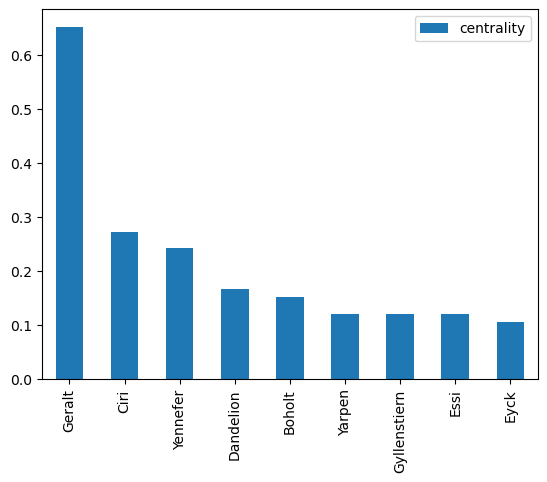

In [28]:
degree_df = pd.DataFrame.from_dict(degree_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
degree_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

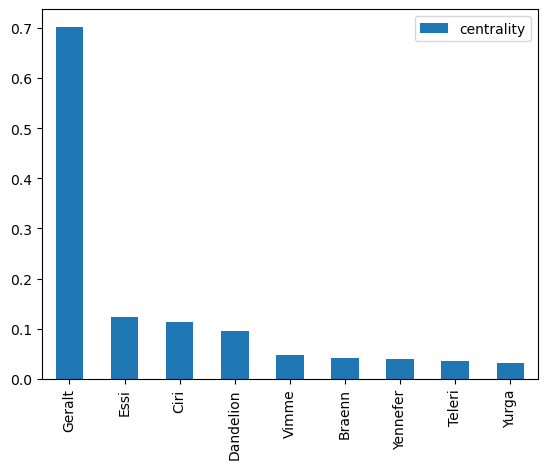

In [29]:
# Betweenness centrality
betweenness_dict = nx.betweenness_centrality(G)
betweenness_df = pd.DataFrame.from_dict(betweenness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
betweenness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

<AxesSubplot:>

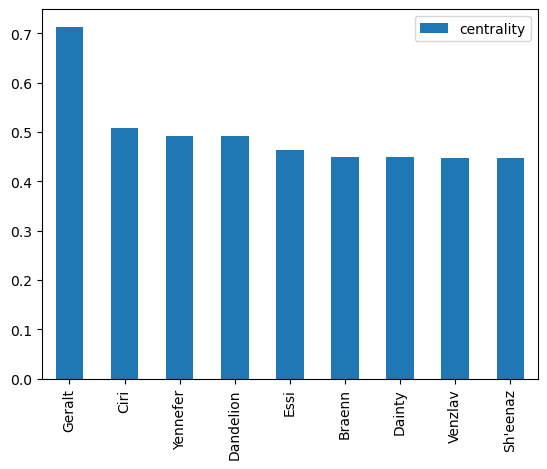

In [30]:
# Closeness centrality
closeness_dict = nx.closeness_centrality(G)
closeness_df = pd.DataFrame.from_dict(closeness_dict, orient='index', columns=['centrality'])
# Plot top 10 nodes
closeness_df.sort_values('centrality', ascending=False)[0:9].plot(kind="bar")

In [31]:
# Save centrality measures
nx.set_node_attributes(G, degree_dict, 'degree_centrality')
nx.set_node_attributes(G, betweenness_dict, 'betweenness_centrality')
nx.set_node_attributes(G, closeness_dict, 'closeness_centrality')

### Community detection

In [32]:
import community as community_louvain

In [33]:
communities = community_louvain.best_partition(G)

In [34]:
communities

{'Geralt': 2,
 'Niedamir': 1,
 'Eyck': 1,
 'Dorregaray': 1,
 'Yennefer': 1,
 'Boholt': 1,
 'Yarpen': 1,
 'Gyllenstiern': 1,
 'Kennet': 1,
 'Crinfrid': 1,
 'Villentretenmerth': 1,
 'Istredd': 2,
 'Herbolth': 2,
 'Ivo': 2,
 'Two': 0,
 'Dandelion': 4,
 'Vespula': 4,
 'Dainty': 4,
 'Vimme': 4,
 'Sulimir': 4,
 'Ther': 4,
 'Rhundurin': 4,
 'Dudu': 4,
 "Sh'eenaz": 4,
 'Gaspard': 6,
 'Teleri': 6,
 'Dalia': 6,
 'Mestvin': 6,
 'Essi': 4,
 'Gerard': 2,
 'Zelest': 2,
 'Duke': 4,
 'Veverka': 2,
 'Akeretta': 2,
 'Agloval': 4,
 'Ebbing': 4,
 'Juan': 4,
 'Cynthia': 4,
 'Braenn': 5,
 'Ciri': 5,
 'Kistrin': 5,
 'Marck': 2,
 'Voymir': 2,
 'Alvina': 5,
 'Vesemir': 5,
 'Ervyll': 5,
 'Freixenet': 5,
 'Venzlav': 5,
 'Ekkehard': 5,
 'Viraxas': 5,
 'Morenn': 5,
 'Mona': 5,
 'Pavetta': 5,
 'Brick': 5,
 'Junghans': 5,
 'Levecque': 5,
 'King': 5,
 'Mousesack': 5,
 'Yurga': 0,
 'Visenna': 2,
 'Triss': 0,
 'Atlan': 0,
 'Vanielle': 0,
 'Lytta': 2,
 'Roach': 0,
 'Nadbor': 3,
 'Sulik': 3}

In [35]:
nx.set_node_attributes(G, communities, 'group')

In [36]:
com_net = Network(notebook = True, width="1000px", height="700px", bgcolor='#222222', font_color='white')
com_net.from_nx(G)
com_net.show("witcher_communities.html")

Local cdn resources have problems on chrome/safari when used in jupyter-notebook. 


### Evolution of characters' importance

In [37]:
from lib.utils.functions import *

In [38]:
# Initialize empty list for graphs from books
books_graph = []
all_books = [b for b in os.scandir('data') if '.txt' in b.name]
# Load spacy English languague model
nlp = spacy.load("en_core_web_sm")

# Sort dir entries by name
all_books.sort(key=lambda x: x.name)

In [39]:
# Loop through book list and create graphs
for book in all_books:
    book_text = ner(book)
    
    # Get list of entities per sentences
    sent_entity_df = get_ne_list_per_sentence(book_text)
    
    # Select only character entities
    sent_entity_df['character_entities'] = sent_entity_df['entities'].apply(lambda x: filter_entity(x, character_df))

    # Filter out sentences that don't have any character entities
    sent_entity_df_filtered = sent_entity_df[sent_entity_df['character_entities'].map(len) > 0]
    
    # Take only first name of characters
    sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0] 
                                                                                                               for item in x])

    # Create relationship df
    relationship_df = create_relationships(df = sent_entity_df_filtered, window_size = 5)                                                                                                               
    
    # Create a graph from a pandas dataframe
    G = nx.from_pandas_edgelist(relationship_df, 
                                source = "source", 
                                target = "target", 
                                edge_attr = "value", 
                                create_using = nx.Graph())     
    
    books_graph.append(G) 

C:\Users\Shree\AppData\Local\Temp\ipykernel_6544\4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\Shree\AppData\Local\Temp\ipykernel_6544\4223697425.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sent_entity_df_filtered['character_entities'] = sent_entity_df_filtered['character_entities'].apply(lambda x: [item.split()[0]
C:\Users\Shree\AppData\Local\Tem

<AxesSubplot:>

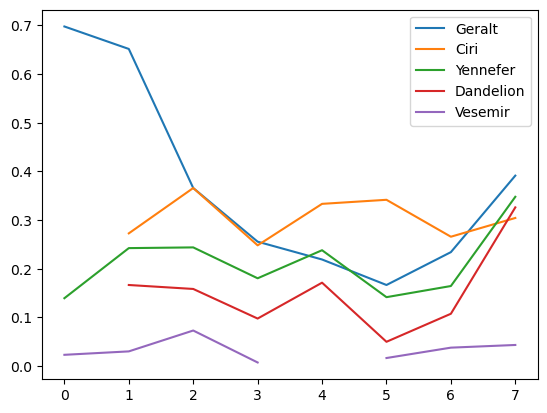

In [40]:
# Creating a list of degree centrality of all the books
evol = [nx.degree_centrality(book) for book in books_graph]

# Creating a DataFrame from the list of degree centralities in all the books
degree_evol_df = pd.DataFrame.from_records(evol)

# Plotting the degree centrality evolution of 5 main characters
degree_evol_df[["Geralt", "Ciri", "Yennefer", "Dandelion", "Vesemir"]].plot()